# Proyek Analisis Data: Bike Sharing Dataset

Nama: Galang Dwiwana Thabrani

Email: galangdwiwana08@gmail.com

ID Dicoding: mc222d5y1375 

# Menentukan Pertanyaan Bisnis
1. Faktor apa saja yang mempengaruhi jumlah penyewaan sepeda per hari?
2. Bagaimana suhu dan kelembaban mempengaruhi penyewaan sepeda per jam?
3. Apakah cuaca mempengaruhi penyewaan sepeda?

# Import  Semua Packages/Library yang Digunakan:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

# Gathering data


In [10]:
# Load data
# Mengupdate path jika file berada di folder 'data'
df_hour = pd.read_csv('data/hour.csv')
df_day = pd.read_csv('data/day.csv')


# Tampilkan 5 baris pertama untuk melihat data
df_hour.head(), df_day.head()


(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

# Assesing Data


In [4]:
# Memeriksa tipe data dan jumlah nilai yang hilang
df_hour.info(), df_day.info()

# Statistik deskriptif untuk memahami distribusi data
df_hour.describe(), df_day.describe()

# Mengecek apakah ada nilai yang hilang
df_hour.isnull().sum(), df_day.isnull().sum()

# Mengecek apakah ada duplikat
df_hour.duplicated().sum(), df_day.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

(0, 0)

# Cleaning Data


In [5]:
# Menghapus duplikat jika ada
df_hour = df_hour.drop_duplicates()
df_day = df_day.drop_duplicates()

# Memeriksa kolom numerik untuk mengisi nilai yang hilang
numerical_cols_hour = df_hour.select_dtypes(include=[np.number]).columns
numerical_cols_day = df_day.select_dtypes(include=[np.number]).columns

# Mengisi nilai yang hilang pada kolom numerik dengan rata-rata (mean)
df_hour[numerical_cols_hour] = df_hour[numerical_cols_hour].fillna(df_hour[numerical_cols_hour].mean())
df_day[numerical_cols_day] = df_day[numerical_cols_day].fillna(df_day[numerical_cols_day].mean())

# Mengisi nilai yang hilang pada kolom kategorikal dengan nilai moda (mode)
categorical_cols_hour = df_hour.select_dtypes(exclude=[np.number]).columns
categorical_cols_day = df_day.select_dtypes(exclude=[np.number]).columns


# Menyimpan data yang sudah dianalisis atau dimodifikasi ke dalam 'main_data.csv'
# Menyimpan df_hour setelah pembersihan
df_hour.to_csv('dashboard/main_data.csv', index=False)

# Menyimpan df_day setelah pembersihan
df_day.to_csv('dashboard/main_data.csv', index=False)

# Menampilkan jumlah nilai yang hilang setelah pembersihan
print("Jumlah nilai yang hilang setelah pembersihan pada df_hour:")
print(df_hour.isnull().sum())

print("\nJumlah nilai yang hilang setelah pembersihan pada df_day:")
print(df_day.isnull().sum())


Jumlah nilai yang hilang setelah pembersihan pada df_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai yang hilang setelah pembersihan pada df_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# Exploratory Data Analysis (EDA)

Korelasi pada df_hour:
             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.0

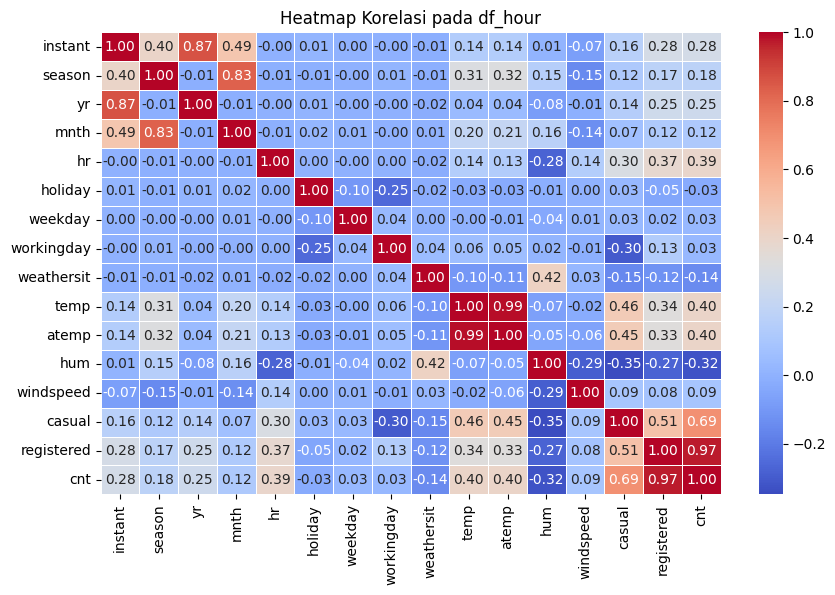

In [6]:
# Menghapus kolom non-numerik seperti 'dteday' yang tidak bisa dihitung korelasinya
df_hour_numeric = df_hour.select_dtypes(include=[np.number])
df_day_numeric = df_day.select_dtypes(include=[np.number])

# Menghitung korelasi antar kolom numerik
correlation_hour = df_hour_numeric.corr()
correlation_day = df_day_numeric.corr()

# Menampilkan hasil korelasi
print("Korelasi pada df_hour:")
print(correlation_hour)

print("\nKorelasi pada df_day:")
print(correlation_day)

# Visualisasi Korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi pada df_hour')
plt.show()


# Visualization & Explanatory Analysis

# Pertanyaan 1


Korelasi antara jumlah penyewaan sepeda dan faktor lain:
                 cnt    season  weathersit      temp       hum  windspeed
cnt         1.000000  0.406100   -0.297391  0.627494 -0.100659  -0.234545
season      0.406100  1.000000    0.019211  0.334315  0.205445  -0.229046
weathersit -0.297391  0.019211    1.000000 -0.120602  0.591045   0.039511
temp        0.627494  0.334315   -0.120602  1.000000  0.126963  -0.157944
hum        -0.100659  0.205445    0.591045  0.126963  1.000000  -0.248489
windspeed  -0.234545 -0.229046    0.039511 -0.157944 -0.248489   1.000000


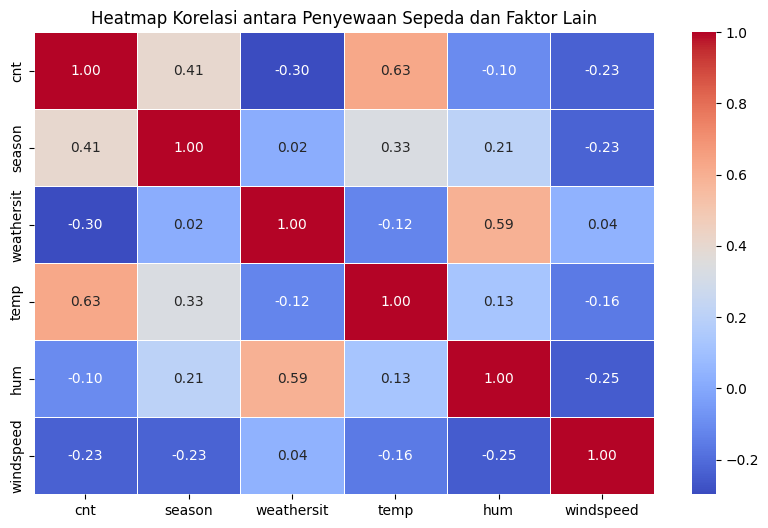

In [7]:
# Menghitung korelasi antara jumlah penyewaan sepeda per hari dengan faktor lain
correlation_day = df_day[['cnt', 'season', 'weathersit', 'temp', 'hum', 'windspeed']].corr()

# Menampilkan hasil korelasi
print("Korelasi antara jumlah penyewaan sepeda dan faktor lain:")
print(correlation_day)

# Visualisasi Korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Penyewaan Sepeda dan Faktor Lain')
plt.show()


# Pertanyaan 2:

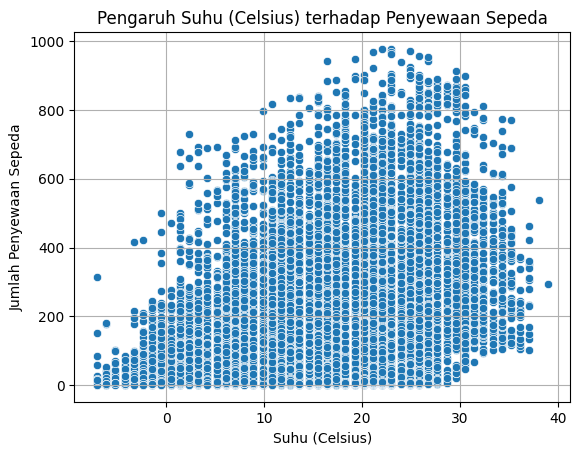

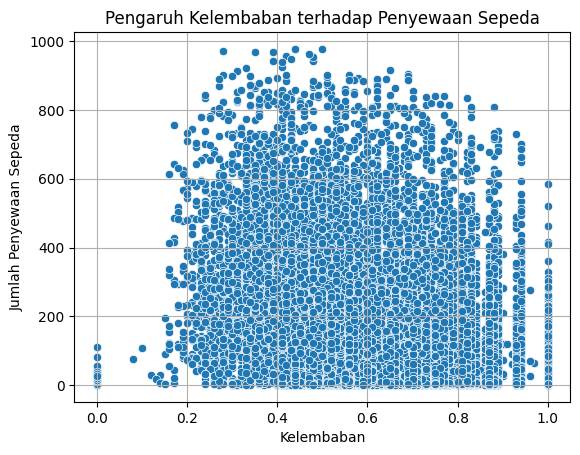

In [8]:
# Konversi suhu (ganti rentang sesuai kebutuhan)
suhu_celsius = df_hour['temp'] * (39 - (-8)) + (-8)
df_hour['temp_celsius'] = suhu_celsius

# Scatter plot suhu vs penyewaan
sns.scatterplot(x='temp_celsius', y='cnt', data=df_hour)

plt.title('Pengaruh Suhu (Celsius) terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.show()
# Scatter plot kelembaban vs penyewaan
sns.scatterplot(x='hum', y='cnt', data=df_hour)

plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban') # Menambahkan label sumbu X
plt.ylabel('Jumlah Penyewaan Sepeda') # Menambahkan label sumbu Y
plt.grid(True) # Menambahkan grid
plt.show()

# Pertanyaan 3:

/var/folders/k6/f1bl9lrs17b16jnlb4lw4dlr0000gn/T/ipykernel_79936/4065128876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df_day, palette='Set2')


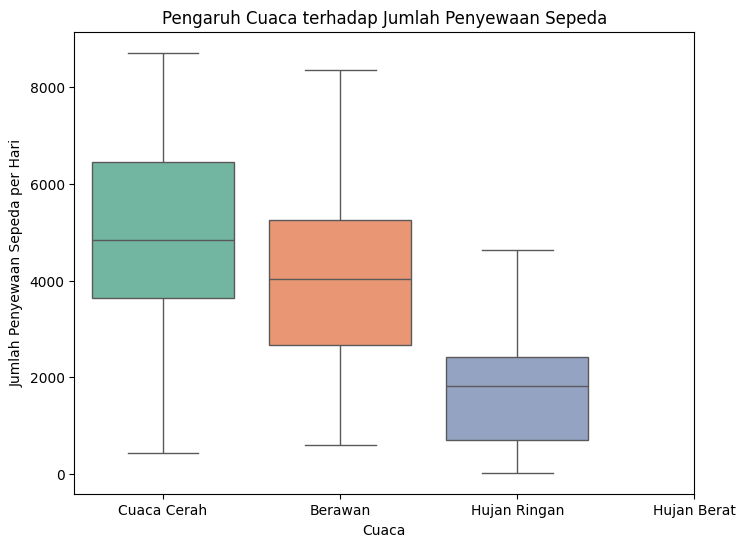

In [9]:
# Boxplot untuk melihat distribusi penyewaan sepeda berdasarkan cuaca
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_day, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda per Hari')
plt.xticks([0, 1, 2, 3], ['Cuaca Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'], rotation=0)
plt.show()


# Conclusion


1. Faktor Apa Saja yang Mempengaruhi Jumlah Penyewaan Sepeda per Hari?

    Dari analisis korelasi, kita dapat melihat faktor-faktor yang berpengaruh signifikan terhadap jumlah penyewaan sepeda per hari (cnt) adalah:

    Suhu (temp): Terdapat korelasi positif yang cukup kuat antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin tinggi jumlah penyewaan sepeda. Hal ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca lebih hangat.

    Cuaca (weathersit): Cuaca cerah dan berawan cenderung berhubungan dengan jumlah penyewaan yang lebih tinggi, sementara cuaca buruk seperti hujan atau salju mengurangi jumlah penyewaan sepeda.

    Musim (season): Musim panas dan musim semi biasanya menunjukkan lebih banyak penyewaan dibandingkan musim dingin.

    Kelembaban (hum): Terdapat korelasi negatif yang lemah antara kelembaban dan jumlah penyewaan sepeda. Semakin tinggi kelembaban, jumlah penyewaan sepeda cenderung menurun sedikit.


2. Bagaimana Suhu dan Kelembaban Mempengaruhi Penyewaan Sepeda per Jam?
Suhu (temp): Grafik menunjukkan hubungan positif yang kuat antara suhu dan jumlah penyewaan sepeda per jam. Ketika suhu meningkat, jumlah penyewaan sepeda juga meningkat. Ini mencerminkan bahwa pada hari-hari yang lebih hangat, lebih banyak orang cenderung menyewa sepeda.

    Kelembaban (hum): Grafik menunjukkan bahwa ada hubungan negatif yang sangat lemah antara kelembaban dan jumlah penyewaan sepeda. Hal ini mungkin berarti bahwa pada hari-hari yang lebih lembab, orang cenderung lebih sedikit menyewa sepeda, meskipun efeknya tidak terlalu besar.


3. Apakah Cuaca Mempengaruhi Penyewaan Sepeda?
Cuaca cerah dan berawan menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan cuaca hujan atau bersalju.
Cuaca hujan atau buruk (seperti salju dan kabut) cenderung mengurangi jumlah penyewaan sepeda. Ini menunjukkan bahwa kondisi cuaca yang lebih buruk mempengaruhi keputusan orang untuk menyewa sepeda.
